# Lecture 03: Dimensionality Reduction

## Learning Objectives
By the end of this lecture, you will be able to:
- Understand the curse of dimensionality
- Apply PCA for linear dimensionality reduction
- Apply UMAP for non-linear visualization
- Choose between PCA and UMAP appropriately
- Interpret explained variance and reduced dimensions

**Prerequisites:** Linear algebra basics, understanding of variance

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, make_blobs, load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
print('✓ Ready for Dimensionality Reduction!')

/Users/sschacht/anaconda3/envs/dspy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✓ Ready for Dimensionality Reduction!


## 1. The Curse of Dimensionality

### The Problem

**High-dimensional data is hard:**
- Cannot visualize (>3 dimensions)
- Distances become meaningless
- Computation becomes slow
- Overfitting risk increases

**Example:** Imagine data with 100 features. How do you visualize it?

### The Solution: Dimensionality Reduction

**Goal:** Transform high-D data → low-D data (2D or 3D)

**Keep:** As much information as possible

**Lose:** Redundant or noisy information

Original data shape: (1797, 64)
  • 1797 samples
  • 64 features (8x8 pixels)

❓ How can we visualize 64-dimensional data?


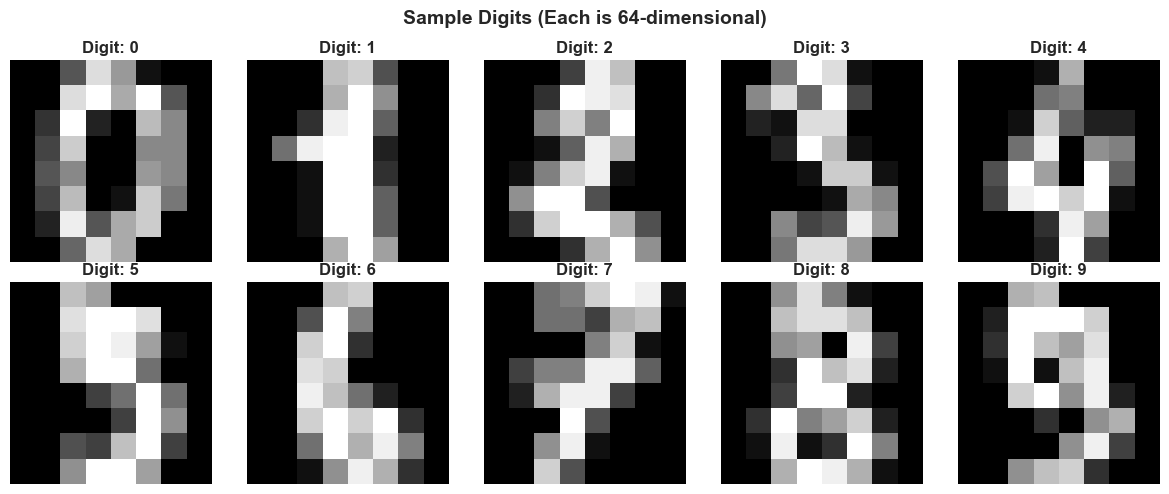


💡 Solution: Reduce 64D → 2D for visualization!


In [2]:
# Demonstrate the problem with high-dimensional data
# Load MNIST digits dataset (64 dimensions)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Original data shape: {X_digits.shape}")
print(f"  • {X_digits.shape[0]} samples")
print(f"  • {X_digits.shape[1]} features (8x8 pixels)")
print(f"\n❓ How can we visualize 64-dimensional data?")

# Visualize a few digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_digits[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Digit: {y_digits[i]}', fontsize=12, fontweight='bold')
    ax.axis('off')
plt.suptitle('Sample Digits (Each is 64-dimensional)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Solution: Reduce 64D → 2D for visualization!")

## 2. PCA: Principal Component Analysis

### Core Idea

**Find new axes (principal components) that capture maximum variance**

**Steps:**
1. Standardize data (mean=0, std=1)
2. Find directions of maximum variance
3. Project data onto these directions
4. Keep top k components

### Key Properties

- **Linear transformation**
- **Ordered by importance** (PC1 > PC2 > PC3...)
- **Orthogonal** (perpendicular) components
- **Deterministic** (same result every time)

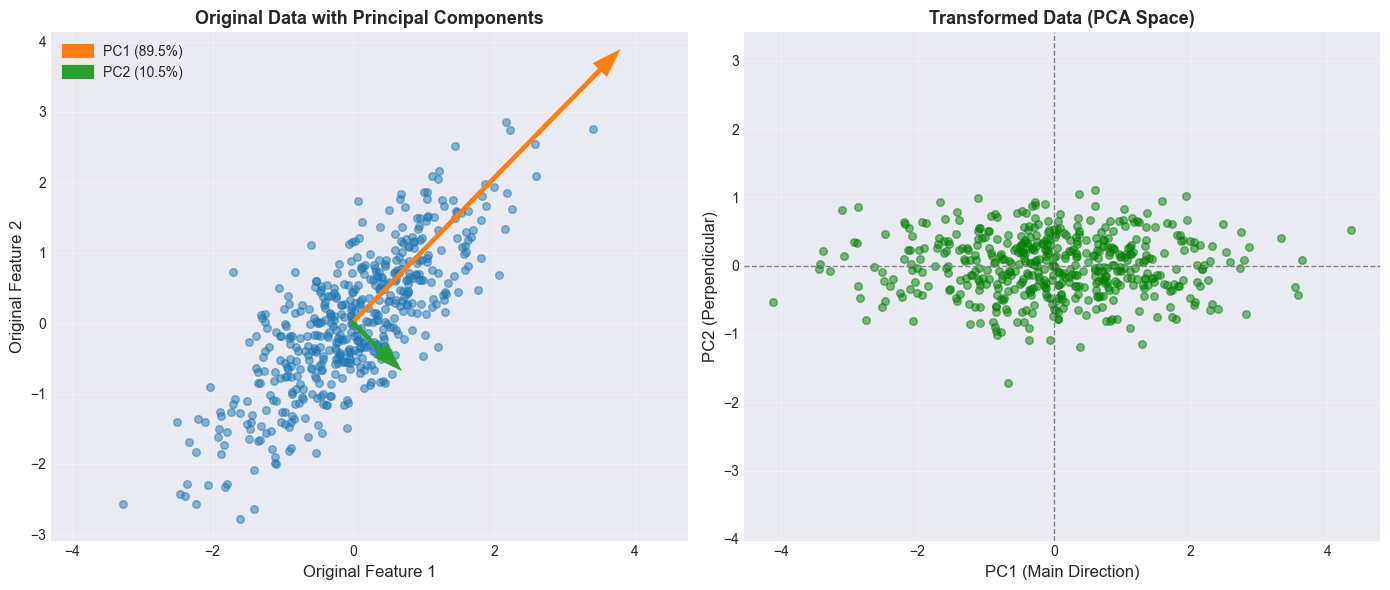


Explained Variance:
  PC1: 89.5%
  PC2: 10.5%
  Total: 100.0%


In [3]:
# Simple 2D example to understand PCA
np.random.seed(42)

# Generate correlated 2D data
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Strong correlation
X_2d = np.random.multivariate_normal(mean, cov, 500)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_2d)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original data with PCA directions
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=30)

# Draw principal component vectors
mean_x = X_2d.mean(axis=0)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var * 3  # Scale for visibility
    axes[0].arrow(mean_x[0], mean_x[1], comp[0], comp[1],
                 head_width=0.2, head_length=0.3, fc=f'C{i+1}', ec=f'C{i+1}',
                 linewidth=3, label=f'PC{i+1} ({pca.explained_variance_ratio_[i]:.1%})')

axes[0].set_xlabel('Original Feature 1', fontsize=12)
axes[0].set_ylabel('Original Feature 2', fontsize=12)
axes[0].set_title('Original Data with Principal Components', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axis('equal')

# Transformed data
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=30, c='green')
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_xlabel('PC1 (Main Direction)', fontsize=12)
axes[1].set_ylabel('PC2 (Perpendicular)', fontsize=12)
axes[1].set_title('Transformed Data (PCA Space)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

print(f"\nExplained Variance:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.1%}")

## 3. PCA on Digits Dataset

Now let's apply PCA to reduce 64D → 2D:

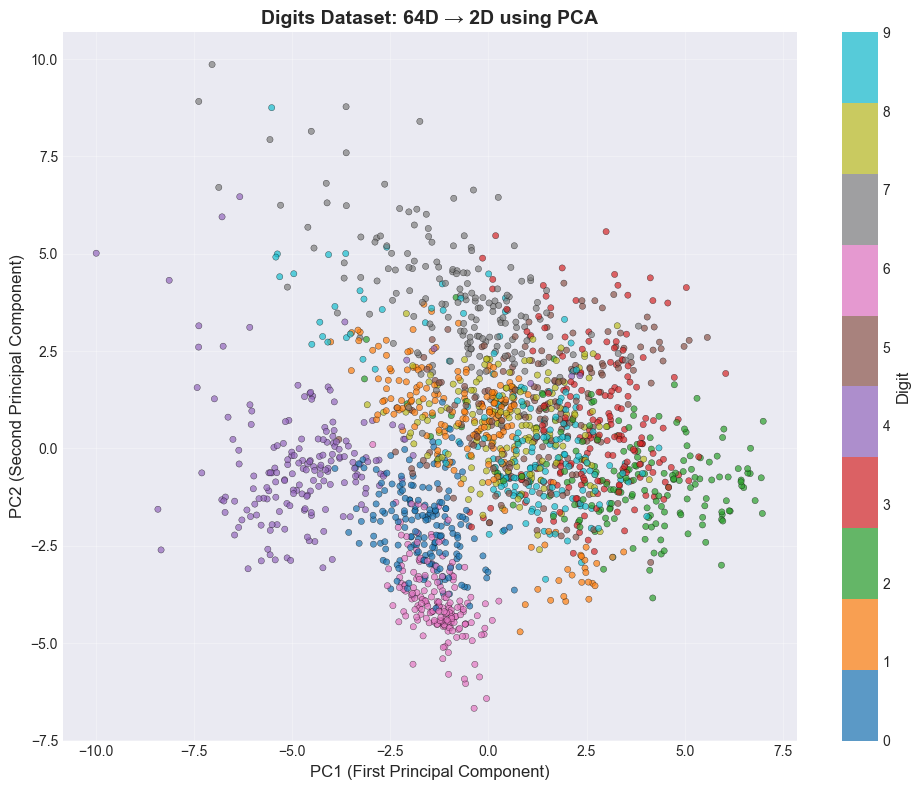


Variance Explained:
  PC1: 12.0%
  PC2: 9.6%
  Total: 21.6%

📊 Only 21.6% of variance captured in 2D!


In [4]:
# Scale the data first (important!)
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits_scaled)

# Visualize
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, 
                    cmap='tab10', s=20, alpha=0.7, edgecolors='black', linewidth=0.3)
ax.set_xlabel('PC1 (First Principal Component)', fontsize=12)
ax.set_ylabel('PC2 (Second Principal Component)', fontsize=12)
ax.set_title('Digits Dataset: 64D → 2D using PCA', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax, ticks=range(10))
cbar.set_label('Digit', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVariance Explained:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.1%}")
print(f"\n📊 Only {pca.explained_variance_ratio_.sum():.1%} of variance captured in 2D!")

## 4. Choosing Number of Components

### Scree Plot: Explained Variance

**Question:** How many components should we keep?

**Answer:** Look at explained variance

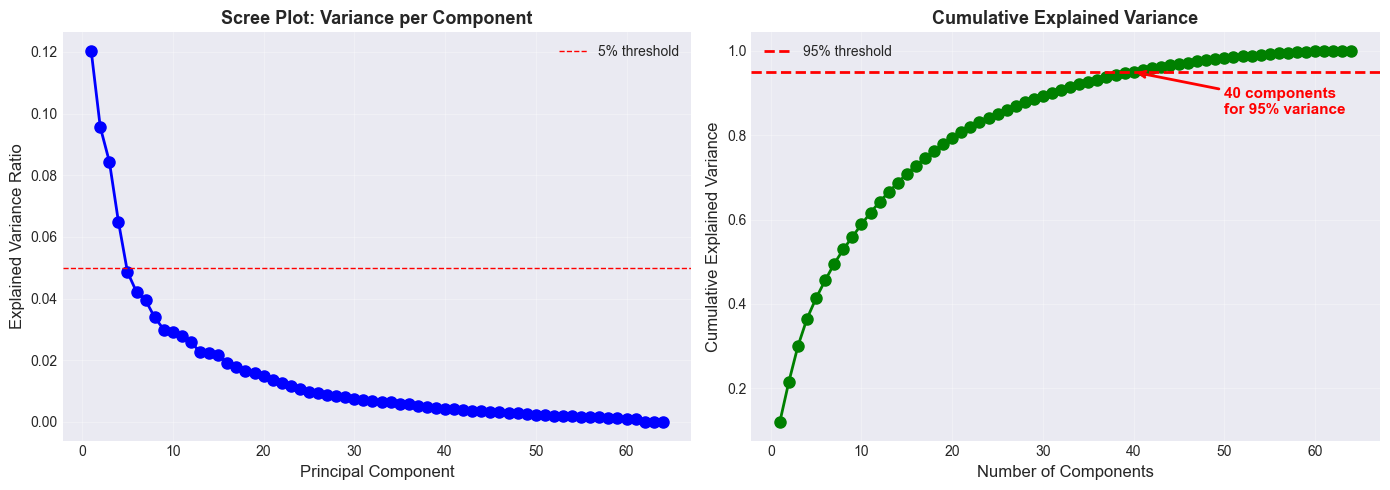


📊 To capture 95% of variance, need 40 components (out of 64)
   Reduction: 64 → 40 (62.5% of original)


In [5]:
# Compute PCA with all components
pca_full = PCA()
pca_full.fit(X_digits_scaled)

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].plot(range(1, len(pca_full.explained_variance_ratio_)+1),
            pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot: Variance per Component', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0.05, color='red', linestyle='--', linewidth=1, label='5% threshold')
axes[0].legend()

# Cumulative explained variance
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(range(1, len(cumsum)+1), cumsum, 'go-', linewidth=2, markersize=8)
axes[1].axhline(0.95, color='red', linestyle='--', linewidth=2, label='95% threshold')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Find number of components for 95%
n_components_95 = np.argmax(cumsum >= 0.95) + 1
axes[1].annotate(f'{n_components_95} components\nfor 95% variance', 
                xy=(n_components_95, 0.95), xytext=(n_components_95+10, 0.85),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print(f"\n📊 To capture 95% of variance, need {n_components_95} components (out of {X_digits.shape[1]})")
print(f"   Reduction: {X_digits.shape[1]} → {n_components_95} ({n_components_95/X_digits.shape[1]:.1%} of original)")

## 5. UMAP: Uniform Manifold Approximation

### Why UMAP?

**PCA Limitation:** Only captures linear relationships

**UMAP:** Captures non-linear relationships, better for visualization

### Key Differences from PCA

| Aspect | PCA | UMAP |
|--------|-----|------|
| **Type** | Linear | Non-linear |
| **Speed** | Very fast | Slower |
| **Use Case** | Preprocessing | Visualization |
| **Preserves** | Global structure | Local structure |
| **Deterministic** | Yes | No (random init) |
| **Parameters** | n_components | n_neighbors, min_dist |

### UMAP Parameters

- **n_neighbors:** Size of local neighborhood (5-50)
  - Small: Focus on local structure
  - Large: Focus on global structure

- **min_dist:** Minimum distance between points (0-1)
  - Small: Tight clumps
  - Large: Loose spread

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


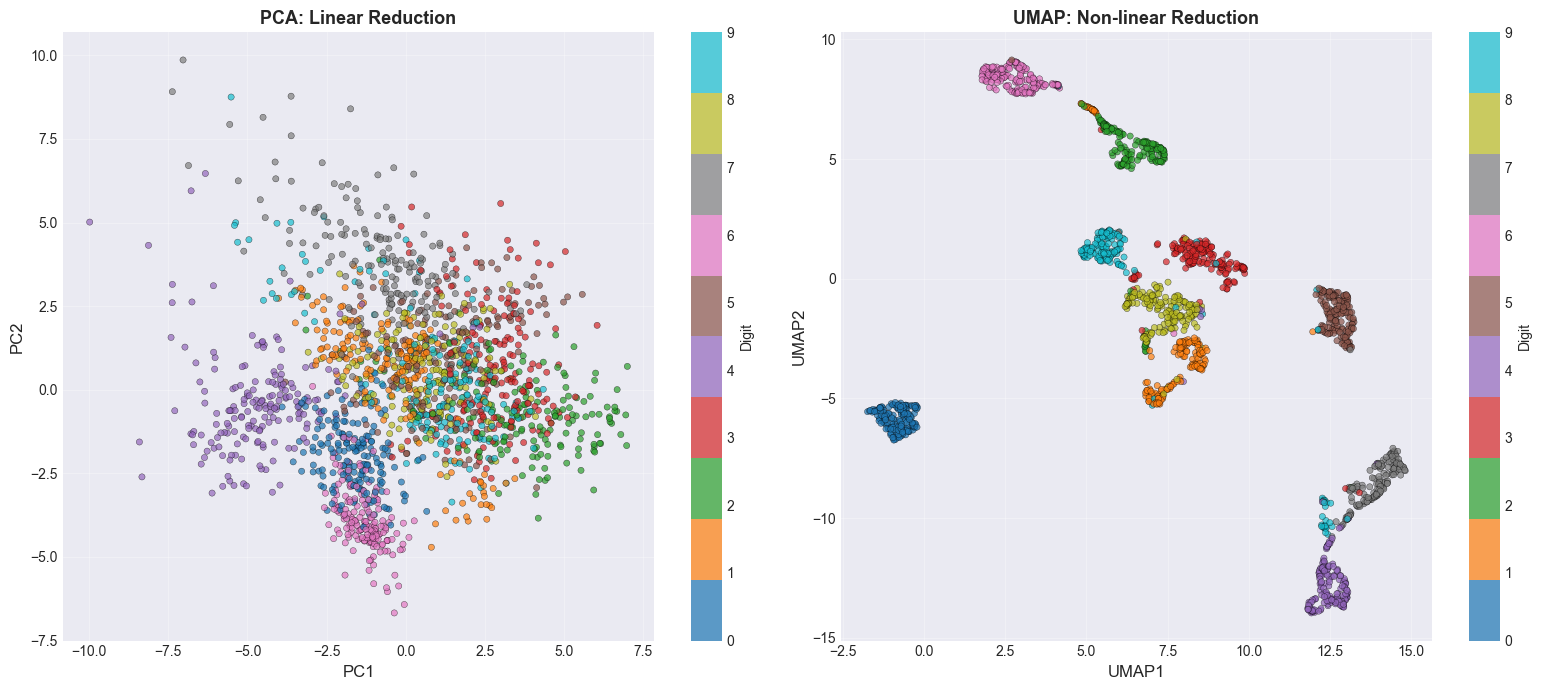


📊 Observations:
  • PCA: Global structure, overlapping digits
  • UMAP: Better separated clusters, preserves local structure
  • UMAP is better for visualization!


In [6]:
# Apply UMAP to digits dataset
# Fix for AttributeError: use umap-learn installation and correct import
try:
    import umap
    UMAPClass = umap.UMAP
except (AttributeError, ImportError):
    try:
        import umap.umap_ as umap_module
        UMAPClass = umap_module.UMAP
    except ImportError:
        raise ImportError("UMAP is not installed. Install with `pip install umap-learn`.")

reducer = UMAPClass(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_digits_scaled)

# Compare PCA vs UMAP
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits,
                          cmap='tab10', s=20, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('PCA: Linear Reduction', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], ticks=range(10), label='Digit')

# UMAP
scatter2 = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y_digits,
                          cmap='tab10', s=20, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1].set_xlabel('UMAP1', fontsize=12)
axes[1].set_ylabel('UMAP2', fontsize=12)
axes[1].set_title('UMAP: Non-linear Reduction', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], ticks=range(10), label='Digit')

plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("  • PCA: Global structure, overlapping digits")
print("  • UMAP: Better separated clusters, preserves local structure")
print("  • UMAP is better for visualization!")

## 6. Effect of UMAP Parameters

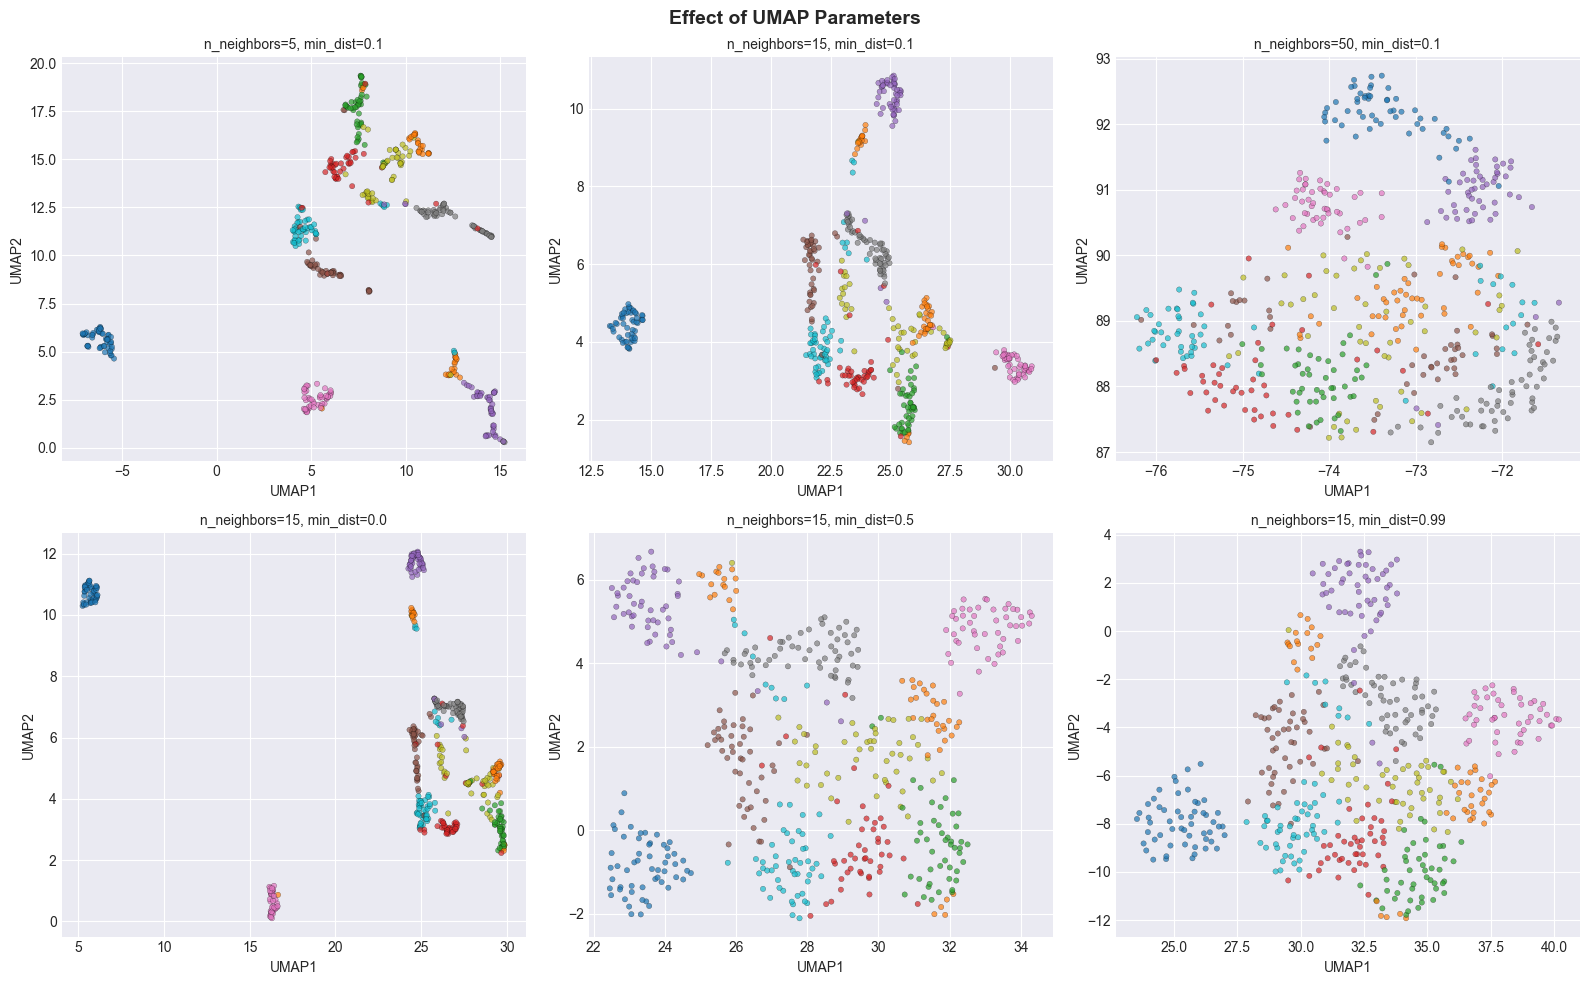


📊 Parameter Effects:
  • Small n_neighbors → More local, detailed clusters
  • Large n_neighbors → More global, broader view
  • Small min_dist → Tight, compact clusters
  • Large min_dist → Spread out, loose clusters


In [7]:
# Test different UMAP parameters
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

params = [
    {'n_neighbors': 5, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 50, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.0},
    {'n_neighbors': 15, 'min_dist': 0.5},
    {'n_neighbors': 15, 'min_dist': 0.99},
]

# Subsample for faster computation
sample_idx = np.random.choice(len(X_digits_scaled), 500, replace=False)
X_sample = X_digits_scaled[sample_idx]
y_sample = y_digits[sample_idx]

for ax, param in zip(axes.flat, params):
    reducer = umap.UMAP(n_components=2, random_state=42, **param)
    X_reduced = reducer.fit_transform(X_sample)
    
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample,
              cmap='tab10', s=15, alpha=0.7, edgecolors='black', linewidth=0.2)
    ax.set_title(f"n_neighbors={param['n_neighbors']}, min_dist={param['min_dist']}",
                fontsize=10)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

plt.suptitle('Effect of UMAP Parameters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Parameter Effects:")
print("  • Small n_neighbors → More local, detailed clusters")
print("  • Large n_neighbors → More global, broader view")
print("  • Small min_dist → Tight, compact clusters")
print("  • Large min_dist → Spread out, loose clusters")

## 7. Real-World Example: Iris Dataset

Let's apply both PCA and UMAP to the classic Iris dataset:

Iris dataset: 150 samples, 4 features
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


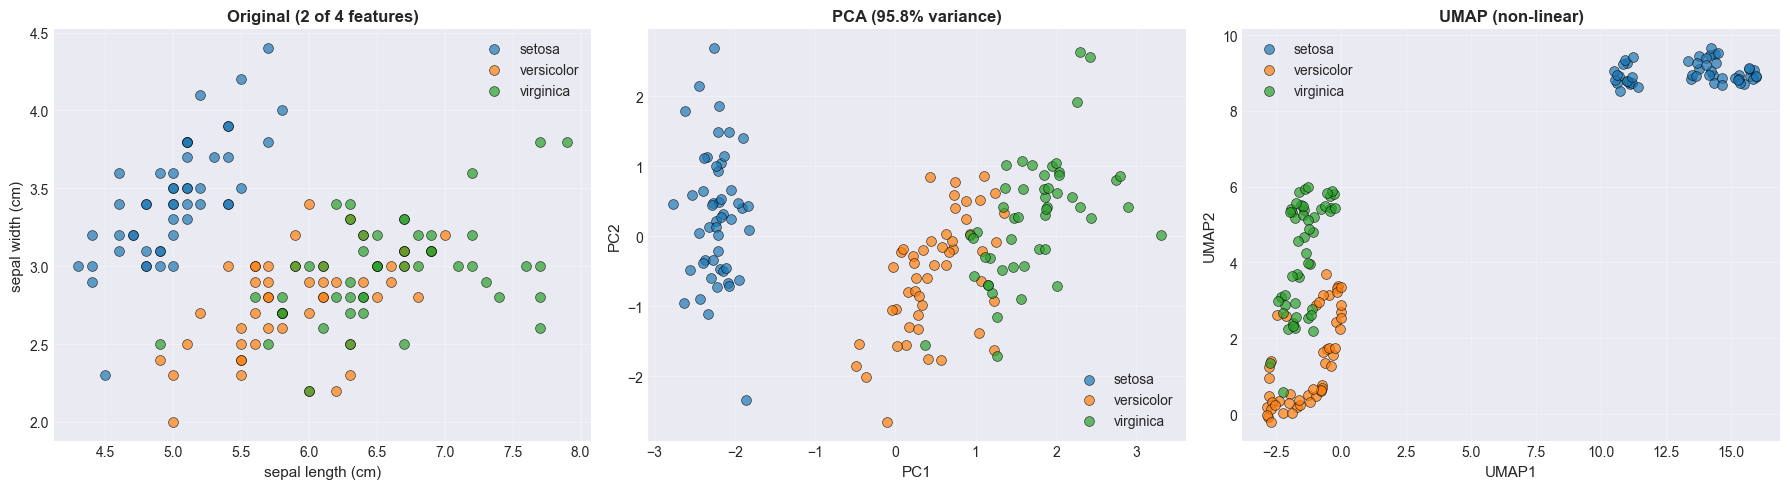


✓ UMAP shows clearer separation between species!


In [8]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names

print(f"Iris dataset: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"Features: {iris.feature_names}")
print(f"Classes: {target_names}")

# Scale data
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Apply PCA
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

# Apply UMAP
umap_iris = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_iris_umap = umap_iris.fit_transform(X_iris_scaled)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original (first 2 features)
for i, name in enumerate(target_names):
    mask = y_iris == i
    axes[0].scatter(X_iris[mask, 0], X_iris[mask, 1], 
                   label=name, s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(iris.feature_names[0], fontsize=11)
axes[0].set_ylabel(iris.feature_names[1], fontsize=11)
axes[0].set_title('Original (2 of 4 features)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PCA
for i, name in enumerate(target_names):
    mask = y_iris == i
    axes[1].scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                   label=name, s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('PC1', fontsize=11)
axes[1].set_ylabel('PC2', fontsize=11)
axes[1].set_title(f'PCA ({pca_iris.explained_variance_ratio_.sum():.1%} variance)', 
                 fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# UMAP
for i, name in enumerate(target_names):
    mask = y_iris == i
    axes[2].scatter(X_iris_umap[mask, 0], X_iris_umap[mask, 1],
                   label=name, s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('UMAP1', fontsize=11)
axes[2].set_ylabel('UMAP2', fontsize=11)
axes[2].set_title('UMAP (non-linear)', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ UMAP shows clearer separation between species!")

## 8. Combining Dimensionality Reduction with Clustering

**Common workflow:**
1. Reduce dimensions (PCA or UMAP)
2. Apply clustering (K-means, DBSCAN)
3. Visualize results

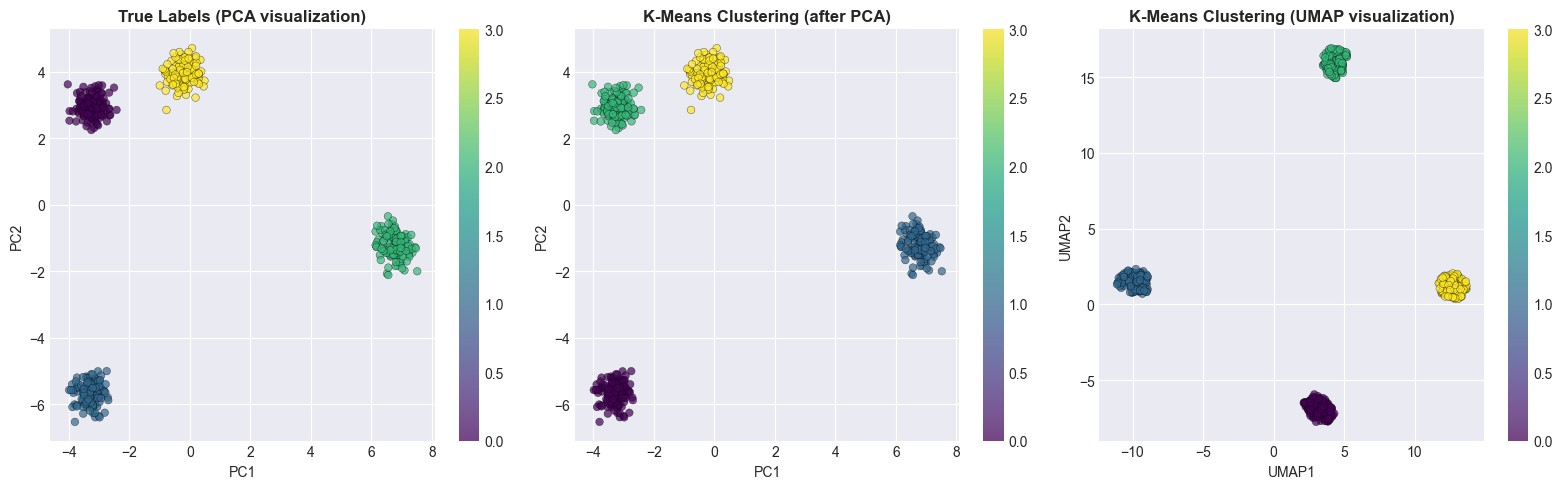


Workflow:
  1. Original: 50D data with 500 samples
  2. Reduce: PCA 50D → 10D (keeps 93.9% variance)
  3. Cluster: K-means on 10D data
  4. Visualize: Further reduce to 2D (PCA or UMAP)

💡 Tip: Use PCA for preprocessing, UMAP for visualization!


In [9]:
from sklearn.cluster import KMeans, DBSCAN

# Generate high-dimensional data
np.random.seed(42)
X_high, y_true = make_blobs(n_samples=500, n_features=50, centers=4, 
                            cluster_std=1.5, random_state=42)

# Scale
X_high_scaled = StandardScaler().fit_transform(X_high)

# Method 1: PCA then cluster
pca_50 = PCA(n_components=10)  # 50D → 10D
X_pca_50 = pca_50.fit_transform(X_high_scaled)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_pca_50)

# For visualization: reduce to 2D
pca_2d = PCA(n_components=2)
X_vis_pca = pca_2d.fit_transform(X_high_scaled)

umap_2d = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_vis_umap = umap_2d.fit_transform(X_high_scaled)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# True labels with PCA
scatter1 = axes[0].scatter(X_vis_pca[:, 0], X_vis_pca[:, 1], c=y_true,
                          cmap='viridis', s=30, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0].set_title('True Labels (PCA visualization)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axes[0])

# Predicted labels with PCA
scatter2 = axes[1].scatter(X_vis_pca[:, 0], X_vis_pca[:, 1], c=y_pred,
                          cmap='viridis', s=30, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1].set_title('K-Means Clustering (after PCA)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axes[1])

# UMAP visualization
scatter3 = axes[2].scatter(X_vis_umap[:, 0], X_vis_umap[:, 1], c=y_pred,
                          cmap='viridis', s=30, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[2].set_title('K-Means Clustering (UMAP visualization)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('UMAP1')
axes[2].set_ylabel('UMAP2')
plt.colorbar(scatter3, ax=axes[2])

plt.tight_layout()
plt.show()

print(f"\nWorkflow:")
print(f"  1. Original: 50D data with 500 samples")
print(f"  2. Reduce: PCA 50D → 10D (keeps {pca_50.explained_variance_ratio_.sum():.1%} variance)")
print(f"  3. Cluster: K-means on 10D data")
print(f"  4. Visualize: Further reduce to 2D (PCA or UMAP)")
print(f"\n💡 Tip: Use PCA for preprocessing, UMAP for visualization!")

## 9. Practical Guidelines

### When to Use What?

**Use PCA when:**
- Preprocessing before ML
- Need deterministic results
- Speed is important
- Want to keep most variance
- Linear relationships expected

**Use UMAP when:**
- Visualization is the goal
- Non-linear relationships
- Need to preserve local structure
- Exploring data

### Do's ✓

1. **Always scale features** before dimensionality reduction
2. **Check explained variance** (for PCA)
3. **Try multiple parameters** (for UMAP)
4. **Visualize results** to validate
5. **Use PCA for preprocessing**, UMAP for visualization

### Don'ts ✗

1. **Don't use raw unscaled data**
2. **Don't interpret distances between clusters in UMAP**
3. **Don't expect UMAP to give same result twice**
4. **Don't use too few components** (lose information)
5. **Don't forget domain knowledge**

## 10. Common Pitfall: Not Scaling

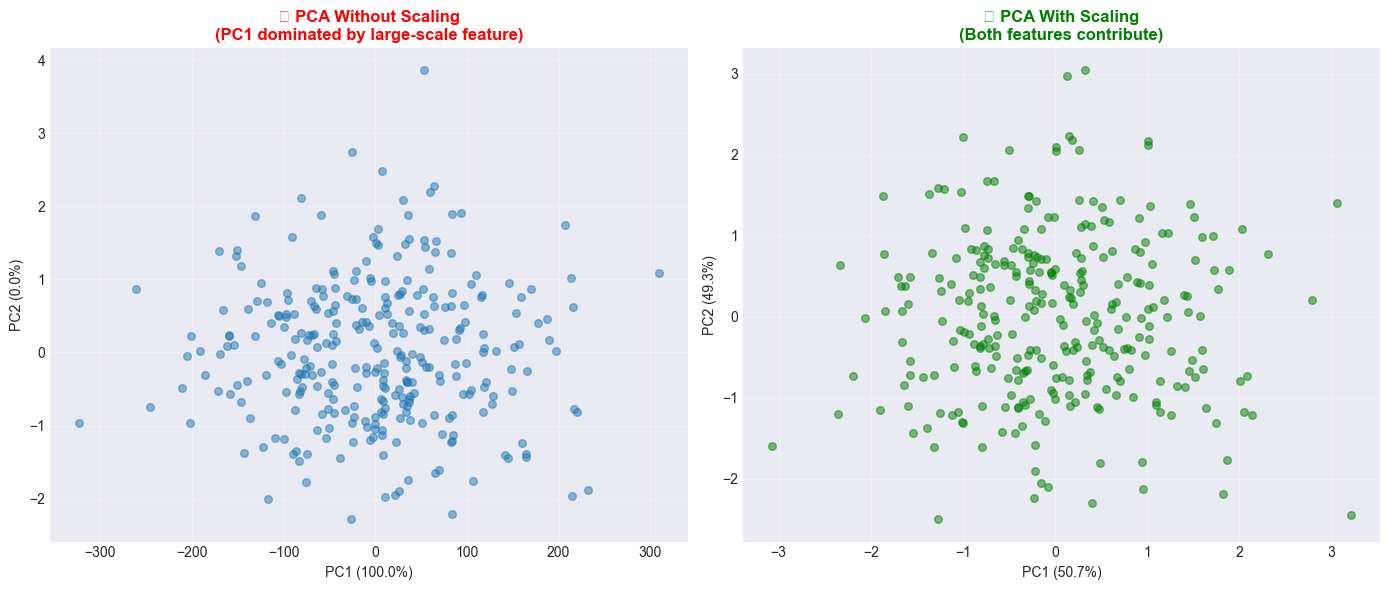


⚠️  Always scale your features before PCA or UMAP!


In [10]:
# Demonstrate importance of scaling
np.random.seed(42)
X_unscaled = np.random.randn(300, 2)
X_unscaled[:, 0] *= 100  # Feature 1: large scale
X_unscaled[:, 1] *= 1     # Feature 2: small scale

# PCA without scaling
pca_wrong = PCA(n_components=2)
X_pca_wrong = pca_wrong.fit_transform(X_unscaled)

# PCA with scaling
X_scaled = StandardScaler().fit_transform(X_unscaled)
pca_right = PCA(n_components=2)
X_pca_right = pca_right.fit_transform(X_scaled)

# Compare
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Without scaling
axes[0].scatter(X_pca_wrong[:, 0], X_pca_wrong[:, 1], alpha=0.5, s=30)
axes[0].set_title('❌ PCA Without Scaling\n(PC1 dominated by large-scale feature)',
                 fontsize=12, fontweight='bold', color='red')
axes[0].set_xlabel(f'PC1 ({pca_wrong.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca_wrong.explained_variance_ratio_[1]:.1%})')
axes[0].grid(True, alpha=0.3)

# With scaling
axes[1].scatter(X_pca_right[:, 0], X_pca_right[:, 1], alpha=0.5, s=30, c='green')
axes[1].set_title('✓ PCA With Scaling\n(Both features contribute)',
                 fontsize=12, fontweight='bold', color='green')
axes[1].set_xlabel(f'PC1 ({pca_right.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca_right.explained_variance_ratio_[1]:.1%})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️  Always scale your features before PCA or UMAP!")

## Summary

### Key Takeaways

1. **Dimensionality reduction** helps visualize and preprocess high-D data

2. **PCA:** Linear, fast, deterministic, good for preprocessing

3. **UMAP:** Non-linear, slower, better visualization

4. **Always scale features** before applying DR

5. **Use PCA for preprocessing, UMAP for visualization**

6. **Check explained variance** to choose number of components

### Comparison Table

| Feature | PCA | UMAP |
|---------|-----|------|
| **Type** | Linear | Non-linear |
| **Speed** | Fast | Slower |
| **Main Use** | Preprocessing | Visualization |
| **Preserves** | Global variance | Local structure |
| **Deterministic** | Yes | No |
| **Interpretable** | Yes (variance) | Less |
| **Parameters** | n_components | n_neighbors, min_dist |

### Workflow

```
High-D Data
    ↓
Scale Features (StandardScaler)
    ↓
PCA (for preprocessing)
    ↓
Apply ML (clustering, classification)
    ↓
UMAP (for visualization)
```

## Next Steps

In the next lecture, we'll explore:
- **Anomaly Detection** (Isolation Forest, One-Class SVM)
- Finding unusual patterns
- Applications in fraud detection

**Practice:** Apply PCA and UMAP to your own datasets in the lab!